In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

import lyaemu.likelihood as lyl

%matplotlib inline


/Users/kwame/Software/lya_emulator/lyaemu/SimulationRunner/SimulationRunner/cambpower.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr

 /Users/kwame/Software/lya_emulator/lyaemu/likelihood.py:83: RuntimeWarning:invalid value encountered in power
 /Users/kwame/Software/lya_emulator/lyaemu/likelihood.py:83: RuntimeWarning:overflow encountered in power


0.5 [ 0.13322133  5.04206089 -4.4643168 ] [ 0.03834259  0.01463727 -0.15356902]
1.0 [ 0.10386641  5.15856268 -3.33765966] [ 0.03091504  0.01533635 -0.12177603]
2.0 [ 0.07873917  5.24739183 -2.7904342 ] [ 0.0274258   0.01598742 -0.1071464 ]
4.0 [ 0.05940326  5.34287979 -2.37235154] [ 0.02467813  0.01665784 -0.09596808]
5.0 [ 0.05400154  5.36697289 -2.29277529] [ 0.0242463   0.0168863  -0.09427555]
10.0 [ 0.04020883  5.44187661 -2.04501603] [ 0.0226755   0.01751263 -0.08798443]
20.0 [ 0.02983492  5.51938787 -1.84393642] [ 0.02135057  0.01811913 -0.08288874]
40.0 [ 0.02202467  5.58594893 -1.69176408] [ 0.02039474  0.01871376 -0.07927586]
50.0 [ 0.01995398  5.6079197  -1.65147186] [ 0.02016686  0.01892337 -0.0784662 ]
100.0 [ 0.0146749   5.67144575 -1.53217808] [ 0.01937357  0.01946611 -0.07556143]
200.0 [ 0.01075479  5.73041108 -1.43796305] [ 0.01881776  0.02004676 -0.07362978]
400.0 [ 0.00786833  5.78631669 -1.35497936] [ 0.01828115  0.02056569 -0.07178949]
500.0 [ 0.0071105   5.80292613

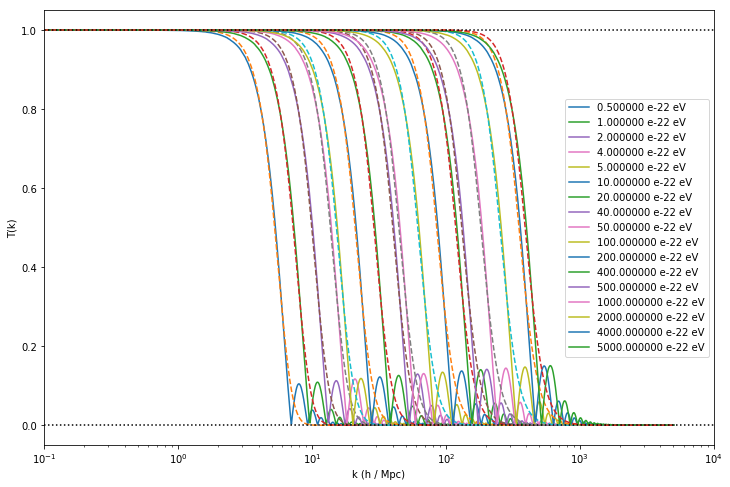

In [2]:
#Load linear power spectra
fname = '/Users/kwame/Software/axionCAMB/axion_%s_matterpower_z_99.dat'
mass_22 = np.array([0.5, 1., 2., 4., 5., 10., 20., 40., 50., 100., 200., 400., 500., 1000., 2000., 4000., 5000.]) #, 10000.]) #, 20000., 50000., 100000.])

linear_power = [None] * (mass_22.size + 1)
linear_power[0] = np.loadtxt(fname%'CDM')

transfer_function = np.zeros((mass_22.size, linear_power[0].shape[0]))
nCDM_parameters = np.zeros((mass_22.size, 3))
nCDM_covariance = np.zeros((mass_22.size, 3, 3))

plt.figure(figsize=(12., 8.))

for i, mass in enumerate(mass_22):
    linear_power[i+1] = np.loadtxt(fname%str(int(mass)))
    transfer_function[i, :] = np.sqrt(linear_power[i+1][:, 1] / linear_power[0][:, 1])
    #Fit nCDM parameters
    nCDM_parameters[i, :], nCDM_covariance[i, :, :] = spo.curve_fit(lyl.transfer_function_nCDM,
                                                        linear_power[i+1][:, 0], transfer_function[i, :],
                                                        p0=np.array([0.05, 5., -5.]))
    print(mass, nCDM_parameters[i, :], np.sqrt(np.diag(nCDM_covariance[i, :, :])) / nCDM_parameters[i, :])

    plt.plot(linear_power[i+1][:, 0], transfer_function[i, :], label=r'%f e-22 eV'%mass)
    plt.plot(linear_power[i+1][:, 0], lyl.transfer_function_nCDM(linear_power[i+1][:, 0], nCDM_parameters[i, 0],
                                        nCDM_parameters[i, 1], nCDM_parameters[i, 2]), ls='--')

plt.xscale('log')
plt.xlim([1.e-1, 1.e+4])
plt.xlabel(r'k (h / Mpc)')
plt.ylabel(r'T(k)')
plt.axhline(y=0., ls=':', color='black')
plt.axhline(y=1., ls=':', color='black')
plt.legend()


In [13]:
#Fit nCDM_parameters = f(log_mass)
def alpha_model(log_mass, b, a, m, c):
    """Model for alpha as a function of log mass"""
    return 10. ** ((b * (log_mass ** 3)) + (a * (log_mass ** 2)) + (m * log_mass) + c)

def beta_model(log_mass, a, m, c):
    """Model for beta as a function of log mass"""
    return (a * (log_mass ** 2)) + (m * log_mass) + c

def gamma_model(log_mass, b, a, m, c):
    """Model for gamma as a function of log mass"""
    return -1. * (10. ** ((b * (log_mass ** 3)) + (a * (log_mass ** 2)) + (m * log_mass) + c))


log10(alpha [Mpc / h]) [5.54530089e-03 3.31718138e-01 6.16422310e+00 3.31219369e+01] [0.14865557 0.15688798 0.17749376 0.23125174]
beta [-0.02576259 -0.82153762 -0.45096863] [-0.04560556 -0.05792384 -1.06531293]
log10(-1 * gamma) [-1.29071567e-02 -7.52873377e-01 -1.47076333e+01 -9.60752318e+01] [-0.12857012 -0.1356867  -0.14224858 -0.14835927]


Text(0.5,0,'log10(mass [eV])')

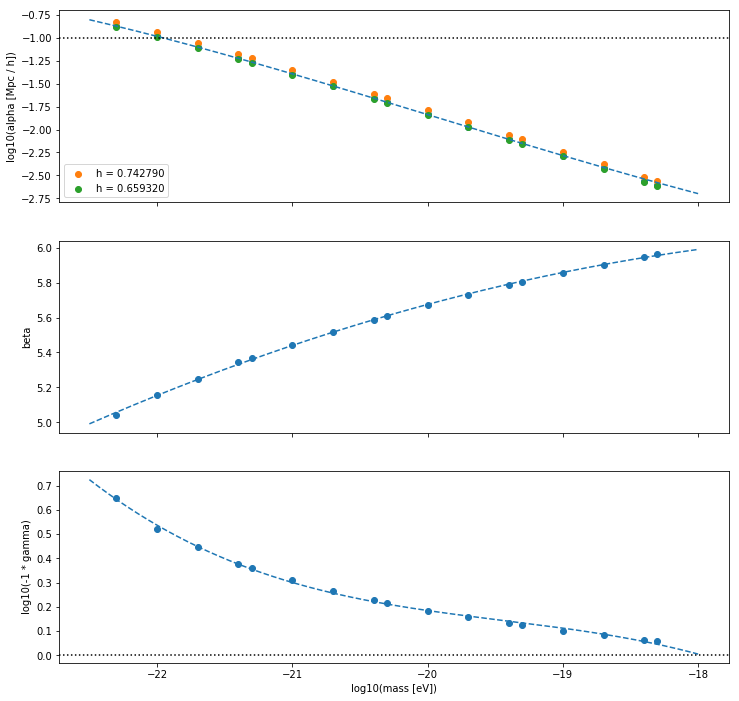

In [17]:
#Study nCDM parameters
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=(12., 12.), sharex=True)
y_label = [r'log10(alpha [Mpc / h])', r'beta', r'log10(-1 * gamma)']

#Fit nCDM model
models = [alpha_model, beta_model, gamma_model]
p0 = [np.array([0., 0., -1., -22.]), np.array([0., -1., -22.]), np.array([0., 0., -1., -22.])]
log_mass_plot = np.linspace(-22.5, -18., num=1000)

for i in range(3):
    model_parameters, model_covariance = spo.curve_fit(models[i], np.log10(mass_22 * 1.e-22), nCDM_parameters[:, i], 
                                                          p0=p0[i], maxfev=8000)
    print(y_label[i], model_parameters, np.sqrt(np.diag(model_covariance)) / model_parameters)
    y_model = models[i](log_mass_plot, *model_parameters)
    
    y_data = nCDM_parameters[:, i]
    if (i == 0):
        y_data = np.log10(y_data)
        y_model = np.log10(y_model)
    if (i == 2):
        y_data = np.log10(-1. * y_data)
        y_model = np.log10(-1. * y_model)
    
    axes[i].scatter(np.log10(mass_22 * 1.e-22), y_data)
    if i == 0:
        hubble_planck = 0.6686
        hubble = 0.74279
        axes[i].scatter(np.log10(mass_22 * 1.e-22), y_data + np.log10(hubble / hubble_planck),
                        label=r'h = %f'%hubble)
        hubble = 0.65932
        axes[i].scatter(np.log10(mass_22 * 1.e-22), y_data + np.log10(hubble / hubble_planck),
                        label=r'h = %f'%hubble)
    axes[i].plot(log_mass_plot, y_model, ls='--')
    axes[i].set_ylabel(y_label[i])

axes[0].axhline(y=-1., ls=':', color='black')
#axes[0].axhline(y=0., ls=':', color='black')
axes[2].axhline(y=0., ls=':', color='black')
#axes[2].axhline(y=-10., ls=':', color='black')

axes[0].legend()

#axes[2].set_ylim([-11., 1.])
axes[2].set_xlabel(r'log10(mass [eV])')
